In [15]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd

Purpose of this given code:- 

1.Ignore warnings (to avoid clutter in output)
2.Set a clean plot style (white background with grid lines)

In [2]:
import warnings
warnings.filterwarnings("ignore")
sns.set(style="whitegrid")

In [16]:
df = pd.read_csv('AIML Dataset.csv')

In [17]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [8]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [10]:
df["isFraud"].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [11]:
df["isFlaggedFraud"].value_counts() 

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

In [15]:
df.isnull().sum().sum()

np.int64(0)

In [18]:
df.shape[0]

6362620

In [19]:
round((df["isFraud"].value_counts()[1] / df.shape[0]) * 100, 2)

np.float64(0.13)

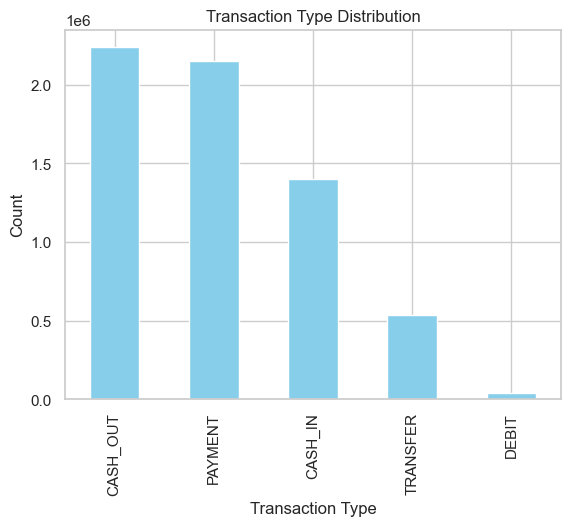

In [20]:
df.type.value_counts().plot(kind='bar', color='skyblue')
plt.title('Transaction Type Distribution')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.show()

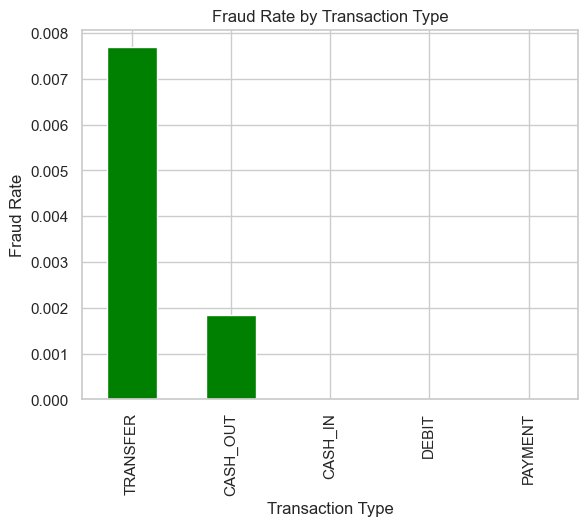

In [21]:
fraud_by_type =df.groupby("type")["isFraud"].mean().sort_values(ascending=False)
fraud_by_type.plot(kind='bar', color='green')
plt.title('Fraud Rate by Transaction Type')
plt.xlabel('Transaction Type')
plt.ylabel('Fraud Rate')
plt.show()

Checking 

In [ ]:
fraud_by_type 

type
TRANSFER    0.007688
CASH_OUT    0.001840
CASH_IN     0.000000
DEBIT       0.000000
PAYMENT     0.000000
Name: isFraud, dtype: float64

In [23]:
df["amount"].describe().astype(int)

count     6362620
mean       179861
std        603858
min             0
25%         13389
50%         74871
75%        208721
max      92445516
Name: amount, dtype: int64

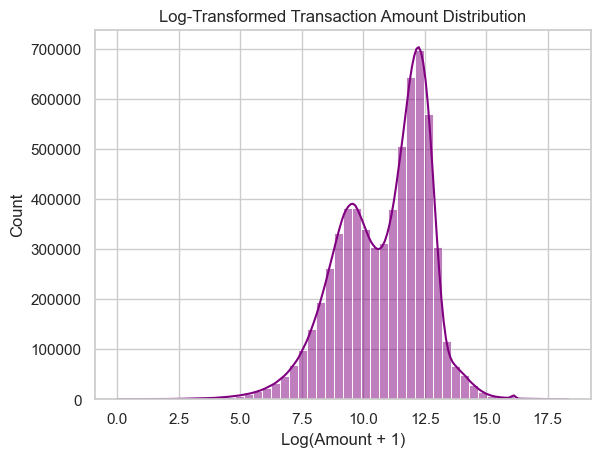

In [25]:
sns.histplot(np.log1p(df["amount"]), bins=50, kde=True, color='purple')
plt.title('Log-Transformed Transaction Amount Distribution')
plt.xlabel('Log(Amount + 1)')
plt.show()

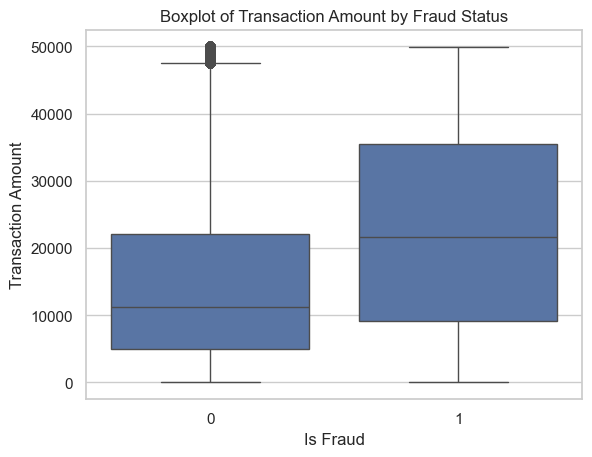

In [26]:
sns.boxplot(data = df[df["amount"]<50000],x = "isFraud",y = "amount",)
plt.title('Boxplot of Transaction Amount by Fraud Status')
plt.xlabel('Is Fraud')
plt.ylabel('Transaction Amount')
plt.show()

In [27]:
df.amount

0             9839.64
1             1864.28
2              181.00
3              181.00
4            11668.14
              ...    
6362615     339682.13
6362616    6311409.28
6362617    6311409.28
6362618     850002.52
6362619     850002.52
Name: amount, Length: 6362620, dtype: float64

In [29]:
df["balanceDiffOriginal"] = df["oldbalanceOrg"] - df["newbalanceOrig"]
df["balanceDiffDestination"] = df["oldbalanceDest"] - df["newbalanceDest"]  


In [30]:
(df["balanceDiffOriginal"] < 0).sum()

np.int64(1399253)

In [32]:
(df["balanceDiffDestination"] < 0).sum()

np.int64(2806464)

In [33]:
df.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOriginal,balanceDiffDestination,balanceDiff
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0,9839.64
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0,1864.28
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00,0.0,181.00
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,181.00,21182.0,21363.00
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,11668.14,0.0,11668.14


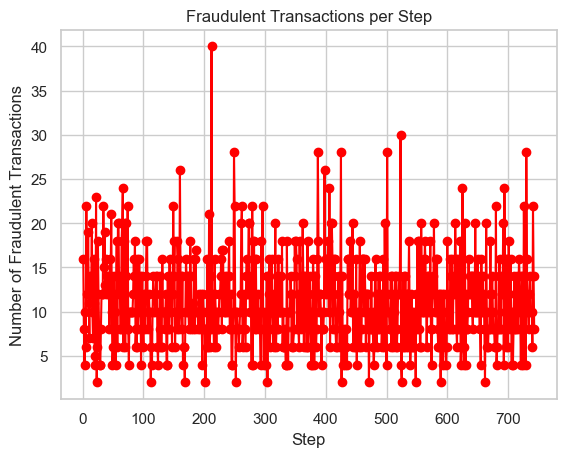

In [35]:
frauds_per_step =df[df["isFraud"] == 1]["step"].value_counts().sort_index()
plt.plot(frauds_per_step.index, frauds_per_step.values, marker='o', linestyle='-', color='red')
plt.title('Fraudulent Transactions per Step')
plt.xlabel('Step')      
plt.ylabel('Number of Fraudulent Transactions')
plt.grid("True")
plt.show()

In [37]:
df.drop(columns="step",inplace=True)

In [39]:
df.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOriginal,balanceDiffDestination,balanceDiff
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0,9839.64
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0,1864.28
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00,0.0,181.00
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,181.00,21182.0,21363.00
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,11668.14,0.0,11668.14


In [40]:
top_senders = df["nameOrig"].value_counts().head(10)

In [41]:
top_senders

nameOrig
C1677795071    3
C1999539787    3
C724452879     3
C1976208114    3
C400299098     3
C1784010646    3
C1530544995    3
C1065307291    3
C545315117     3
C1902386530    3
Name: count, dtype: int64

In [42]:
top_receivers = df["nameDest"].value_counts().head(10)

In [43]:
top_receivers

nameDest
C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
C1590550415    101
C1789550256     99
C451111351      99
C1360767589     98
C1023714065     97
Name: count, dtype: int64

In [44]:
fraud_users = df[df["isFraud"] == 1]["nameOrig"].value_counts().head(10)

In [45]:
fraud_users

nameOrig
C1280323807    1
C1305486145    1
C840083671     1
C1420196421    1
C2101527076    1
C137533655     1
C1118430673    1
C749981943     1
C1334405552    1
C467632528     1
Name: count, dtype: int64

In [46]:
fraud_users = df[df["isFraud"] == 0]["nameOrig"].value_counts().head(10)

In [47]:
fraud_users

nameOrig
C1999539787    3
C1832548028    3
C545315117     3
C1902386530    3
C2051359467    3
C400299098     3
C724452879     3
C1976208114    3
C1784010646    3
C1677795071    3
Name: count, dtype: int64

In [48]:
fraud_types = df[df['type'].isin(['TRANSFER', 'CASH_OUT'])]

In [49]:
fraud_types["type"].value_counts()

type
CASH_OUT    2237500
TRANSFER     532909
Name: count, dtype: int64

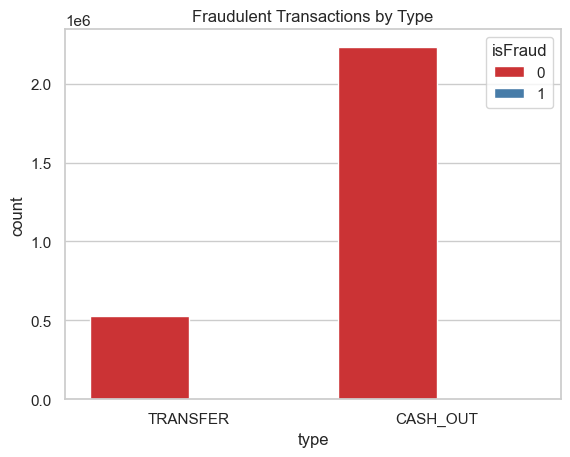

In [50]:
sns.countplot(data=fraud_types, x='type', hue='isFraud', palette='Set1')
plt.title('Fraudulent Transactions by Type')
plt.show()

In [56]:
corr =df[["isFraud", "amount", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest"]].corr()

In [57]:
corr

,isFraud,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
isFraud,1.000000,0.076688,0.010154,-0.008148,-0.005885,0.000535
amount,0.076688,1.000000,-0.002762,-0.007861,0.294137,0.459304
oldbalanceOrg,0.010154,-0.002762,1.000000,0.998803,0.066243,0.042029
newbalanceOrig,-0.008148,-0.007861,0.998803,1.000000,0.067812,0.041837
oldbalanceDest,-0.005885,0.294137,0.066243,0.067812,1.000000,0.976569
newbalanceDest,0.000535,0.459304,0.042029,0.041837,0.976569,1.000000


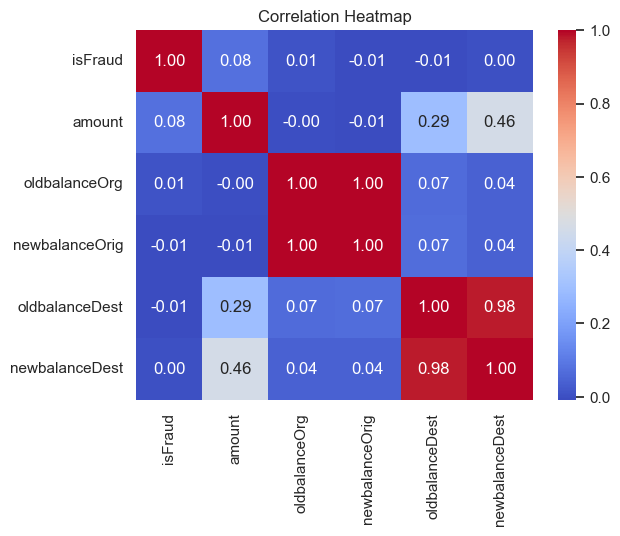

In [58]:
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [71]:
zero_after_transfer = df[
    (df["oldbalanceOrg"] > 0) &
    (df["newbalanceOrig"] == 0) &
    (df["type"].isin(["TRANSFER","CASH_OUT"]))
]

In [72]:
zero_after_transfer

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOriginal,balanceDiffDestination,balanceDiff
2,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0,181.00,0.00,1.810000e+02
3,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0,181.00,21182.00,2.136300e+04
15,CASH_OUT,229133.94,C905080434,15325.00,0.0,C476402209,5083.00,51513.44,0,0,15325.00,-46430.44,-3.110544e+04
19,TRANSFER,215310.30,C1670993182,705.00,0.0,C1100439041,22425.00,0.00,0,0,705.00,22425.00,2.313000e+04
24,TRANSFER,311685.89,C1984094095,10835.00,0.0,C932583850,6267.00,2719172.89,0,0,10835.00,-2712905.89,-2.702071e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0,339682.13,-339682.13,0.000000e+00
6362616,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0,6311409.28,0.00,6.311409e+06
6362617,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0,6311409.28,-6311409.27,1.000000e-02
6362618,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0,850002.52,0.00,8.500025e+05


In [73]:
len(zero_after_transfer)

1188074

In [74]:
zero_after_transfer.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOriginal,balanceDiffDestination,balanceDiff
2,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0,181.0,0.00,181.00
3,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0,181.0,21182.00,21363.00
15,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0,15325.0,-46430.44,-31105.44
19,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,0,705.0,22425.00,23130.00
24,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0,10835.0,-2712905.89,-2702070.89


In [75]:
df["isFraud"].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [10]:
from sklearn.model_selection import train_test_split        # For splitting dataset
from sklearn.preprocessing import StandardScaler            # For feature scaling
from sklearn.linear_model import LogisticRegression         # ML model
from sklearn.metrics import classification_report, confusion_matrix   # ✅ For evaluation
from sklearn.pipeline import Pipeline                                 # ✅ For building ML pipeline
from sklearn.compose import ColumnTransformer                         # ✅ For transforming columns
from sklearn.preprocessing import OneHotEncoder

In [18]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [19]:
df_modal = df.drop(["nameOrig", "nameDest", "isFlaggedFraud"], axis=1)

In [6]:
categorical = ["type"]
numeric = ["amount", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest"]

In [20]:
y = df_modal["isFraud"]
X = df_modal.drop("isFraud", axis=1)


In [21]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [22]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)   

Preprocessing the data


In [23]:
preprocesssor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric),
        ("cat", OneHotEncoder(drop="first"), categorical)
    ],
    remainder="drop"
)


In [26]:
pipeline = Pipeline([
    ("prep", preprocesssor),
    ("clif", LogisticRegression(class_weight="balanced", max_iter=1000))
])

In [27]:
pipeline.fit(x_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['amount', 'oldbalanceOrg',
                                                   'newbalanceOrig',
                                                   'oldbalanceDest',
                                                   'newbalanceDest']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['type'])])),
                ('clif',
                 LogisticRegression(class_weight='balanced', max_iter=1000))])

In [30]:
y_pred =pipeline.predict(x_test)

In [32]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97   1906351
           1       0.02      0.93      0.04      2435

    accuracy                           0.95   1908786
   macro avg       0.51      0.94      0.51   1908786
weighted avg       1.00      0.95      0.97   1908786



In [33]:
confusion_matrix(y_test, y_pred)

array([[1802592,  103759],
       [    169,    2266]])

In [34]:
pipeline.score(x_test, y_test)

0.9455528278183096

In [35]:
import joblib
joblib.dump(pipeline, 'fraud_detection_model.pkl')

['fraud_detection_model.pkl']